<a href="https://colab.research.google.com/github/Alek-dr/mipt/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набрано как минимум 2 балла из 10.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR и добавляете проверяющих вне зависимости от того чьи семинары вы посещали
    `@boyarnikov`
    `@KatyaProkhorchuk`

**Проверяющие не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%pip install gdown

In [2]:
!gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100% 3.98M/3.98M [00:00<00:00, 82.7MB/s]


Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv('/content/coins.csv', index_col='date', parse_dates=True)

Посмотрим что получилось

In [5]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [6]:
coin_names = coins['name'].unique()
len(coin_names)

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [7]:
min_date, max_date = coins.index.min(), coins.index.max()
f'{min_date} - {max_date}'

'2013-04-28 00:00:00 - 2018-06-06 00:00:00'

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [8]:
# Пропуски есть в колонках price, txCount, txVolume, activeAddresses
coins.isnull().sum()

,0
price,327
txCount,1520
txVolume,1830
activeAddresses,1520
symbol,0
name,0
open,0
high,0
low,0
close,0


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [9]:
# Биткоин 2017-12-17
coins[coins.high == coins.high.max()][['name', 'high']]

,name,high
date,,
2017-12-17,Bitcoin,20089.0


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

g = coins.groupby('name', as_index=False)['market'].mean().sort_values(by='market', ascending=False)

Cамая высокая средняя капитализация:
name                 Bitcoin
market    30782136351.018219
Name: 7, dtype: object
Cамая низкая средняя капитализация:
name        KingN Coin
market    41600.984314
Name: 34, dtype: object


<Axes: ylabel='market'>

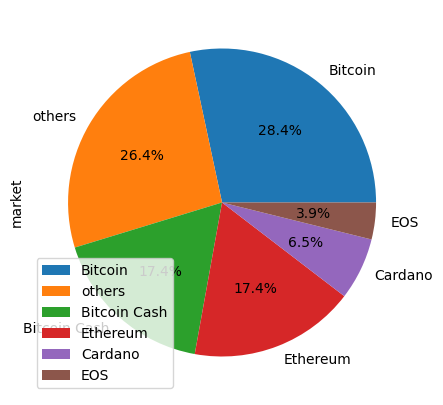

In [10]:
g = coins.groupby('name', as_index=False)['market'].mean().sort_values(by='market', ascending=False)
print(f'Cамая высокая средняя капитализация:\n{g.iloc[0]}')
print(f'Cамая низкая средняя капитализация:\n{g.iloc[-1]}')
# Выделим топ 5, иначе график получается некрасивый и неинформативный
top_n = 5
top = g.iloc[0:top_n]
others = pd.DataFrame({'name': 'others',  'market': [g.iloc[5:].market.sum()]})
df = pd.concat((top, others))
df = df.sort_values(by='market', ascending=False)

df.plot.pie(y='market', labels=df.name, autopct='%1.1f%%', figsize=(5, 5))

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [11]:
def plot_fancy_price_action(coins: pd.DataFrame, symbol: str, start_date: str, end_date: str):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    specified_coin = coins[coins.symbol == symbol]

    fig, ax = plt.subplots(figsize=(16, 12))
    specified_coin[start_date:end_date][['open']].plot(ax=ax, style='-', color='b')
    specified_coin[start_date:end_date][['close']].plot(ax=ax, style='-', color='g')
    specified_coin[start_date:end_date][['low']].plot(ax=ax, style='o', color='y', ms=2)
    specified_coin[start_date:end_date][['high']].plot(ax=ax, style='o', color='r', ms=2)
    plt.ylabel('Цена')
    plt.xlabel('Период')
    plt.title(symbol)
    plt.grid()
    plt.show()

Посмотрим, что получилось:

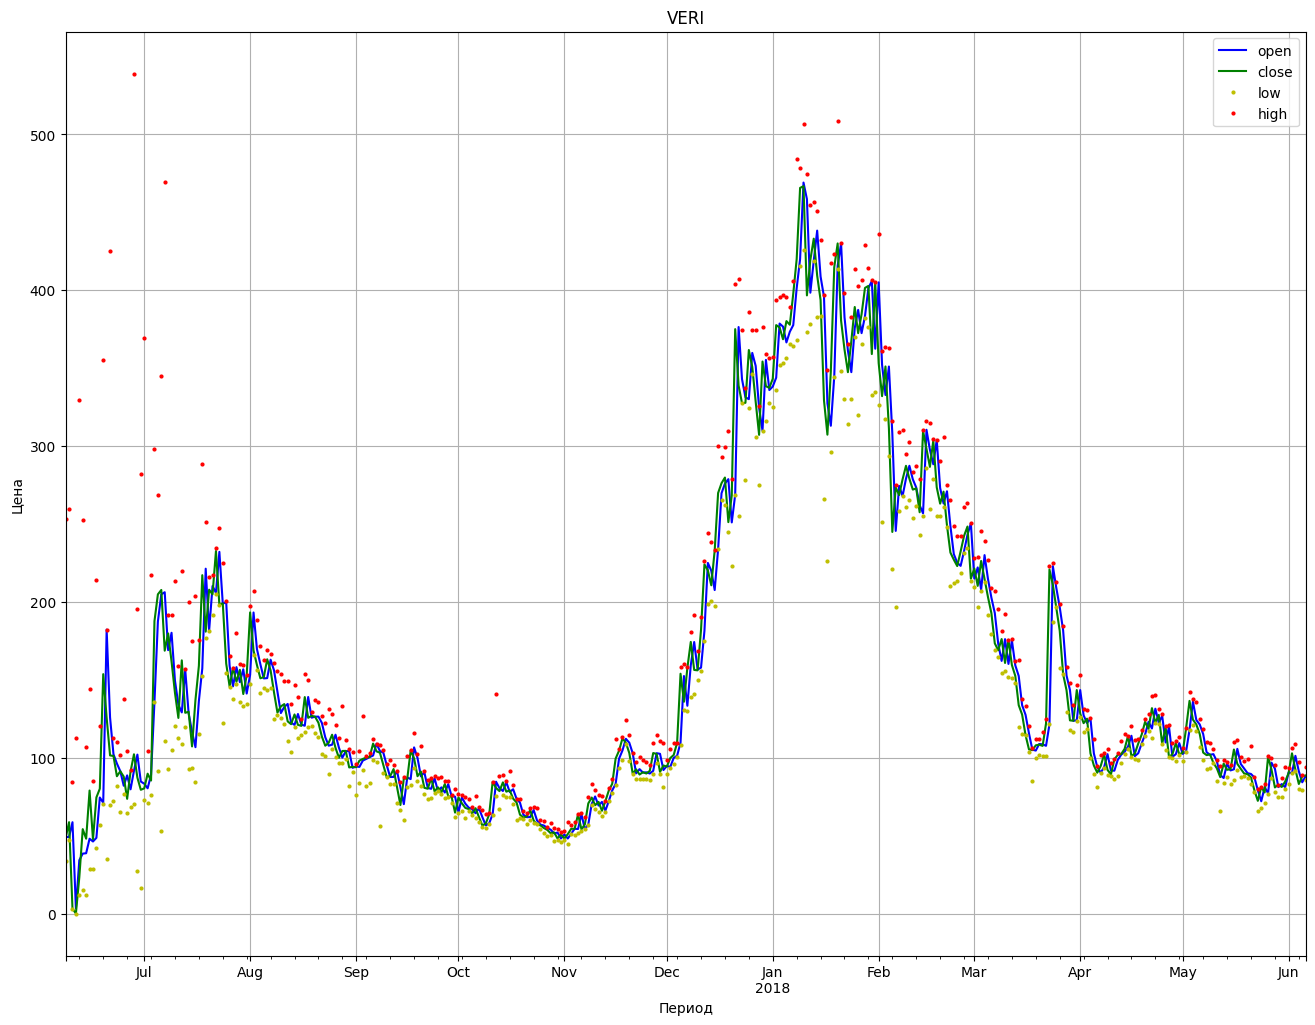

In [12]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [13]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date) -> pd.Series:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    specified_coin = coins[coins.symbol == symbol]
    specified_coin = specified_coin.loc[start_date:end_date]
    specified_coin['pnd'] = specified_coin.apply(lambda row: row.high / max(row.open, row.close), axis=1)
    return specified_coin[specified_coin.pnd == specified_coin.pnd.max()]

In [14]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,pnd
date,,,,,,,,,,,,,
2017-11-29,10077.4,397917.0,2.845830e+10,1131747.0,BTC,Bitcoin,10077.4,11517.4,9601.03,9888.61,1.156880e+10,1.683670e+11,1.142894


Сравните эти значения для разных монет:

## 4. Окупаемость инвестиций (1 балл)

In [15]:
start_date='2017-06-01'
end_date='2018-06-01'
results = []
for symbol in coins['symbol'].unique():
    res = find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01')
    results.append(res)

res = pd.concat(results)
res = res[['price', 'symbol', 'name', 'high', 'low', 'close', 'pnd']]
res.sort_values('pnd', ascending=False)

,price,symbol,name,high,low,close,pnd
date,,,,,,,
2017-06-11,3.350000,VERI,Veritaseum,112.390000,0.000337,0.000338,33.549254
2017-06-29,0.018567,FUN,FunFair,0.254108,0.011891,0.020344,12.490562
2017-09-16,0.001815,TRX,TRON,0.017671,0.001371,0.001831,9.651010
2018-03-13,0.359024,BTM,Bitmark,6.430000,0.818480,0.895801,7.177933
2018-02-21,132.130000,BTG,Bitgem,60.370000,7.710000,10.450000,5.777033
...,...,...,...,...,...,...,...
2017-11-29,10077.400000,BTC,Bitcoin,11517.400000,9601.030000,9888.610000,1.142894
2018-04-24,1.600000,CTXC,Cortex,2.000000,1.600000,1.750000,1.142857
2018-01-04,1.840000,XEM,NEM,2.090000,1.540000,1.640000,1.135870


Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [16]:
def compute_roi(coins: pd.DataFrame, investments: dict, start_date: str, end_date: str) -> float:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    symbols = list(investments.keys())
    start = coins.loc[start_date]
    start = start[start.symbol.isin(symbols)]
    end = coins.loc[end_date]
    end = end[end.symbol.isin(symbols)]
    coeff = {}
    for symbol in investments.keys():
        end_price = end[end.symbol == symbol].price
        start_price = start[start.symbol == symbol].price
        coeff[symbol] = end_price[0] / start_price[0]
    end_date_price = sum([investments[symbol] * coeff[symbol] for symbol in symbols])
    start_date_price = sum(investments.values())
    return end_date_price / start_date_price

In [17]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

<ipython-input-16-c853d221fa43>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeff[symbol] = end_price[0] / start_price[0]


0.9644308669347244

In [18]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

<ipython-input-16-c853d221fa43>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeff[symbol] = end_price[0] / start_price[0]


52.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [19]:
def plot_bollinger_bands(coins: pd.DataFrame, symbol: str, window: int, width: int):
    specified_coin = coins[coins.symbol == symbol][['symbol', 'price']]
    rolling = specified_coin['price'].rolling(window, center=True)
    data = pd.DataFrame({'price': specified_coin.price,
                         'rolling_mean': rolling.mean(),
                         'rolling_std': rolling.std()})
    data['upper_bound'] = data.apply(lambda row: row.rolling_mean + width*row.rolling_std, axis=1)
    data['low_bound'] = data.apply(lambda row: row.rolling_mean - width*row.rolling_std, axis=1)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax = data.plot(style=['-', '--', ':'], ax=ax)
    ax.lines[0].set_alpha(0.3)
    ax.grid()
    # fig.show()

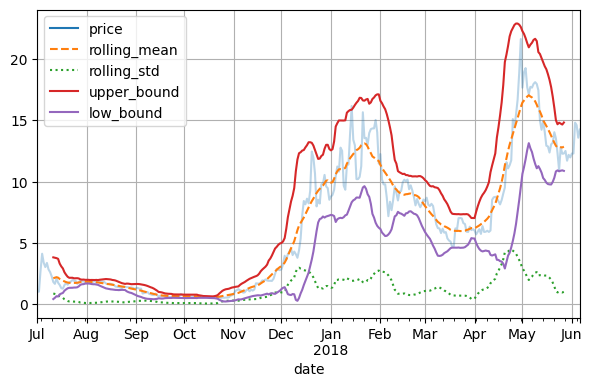

In [20]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Выполняется в некоторых точках (метод определения на глаз)

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [21]:
def plot_coins_capitalizations(coins: pd.DataFrame, symbols: tuple, start_date: str):
    start_date = pd.to_datetime(start_date)
    coins = coins[start_date:]
    specified_coins = coins[coins.symbol.isin(symbols)][['symbol', 'market']]

    fig, ax = plt.subplots(2, 1, figsize=(6, 12))
    for symbol in symbols:
        specified_coins[specified_coins.symbol == symbol].plot(ax=ax[0], legend=False)
    ax[0].set_title('Общая капитализация')

    max_ind = specified_coins.index.max()
    specified_coins = specified_coins.loc[max_ind]
    not_specified_coins = coins[~coins.symbol.isin(symbols)][['symbol', 'market']]
    not_specified_coins = not_specified_coins.loc[max_ind]
    others = pd.DataFrame({'symbol': 'others', 'market': [not_specified_coins.market.sum()]})
    df = pd.concat((specified_coins, others))
    df = df.sort_values(by='market', ascending=False)
    df.plot.pie(y='market', labels=df.symbol, autopct='%1.1f%%', ax=ax[1])
    ax[1].set_title('Доля капитализации')
    fig.legend(symbols)
    # fig.show()

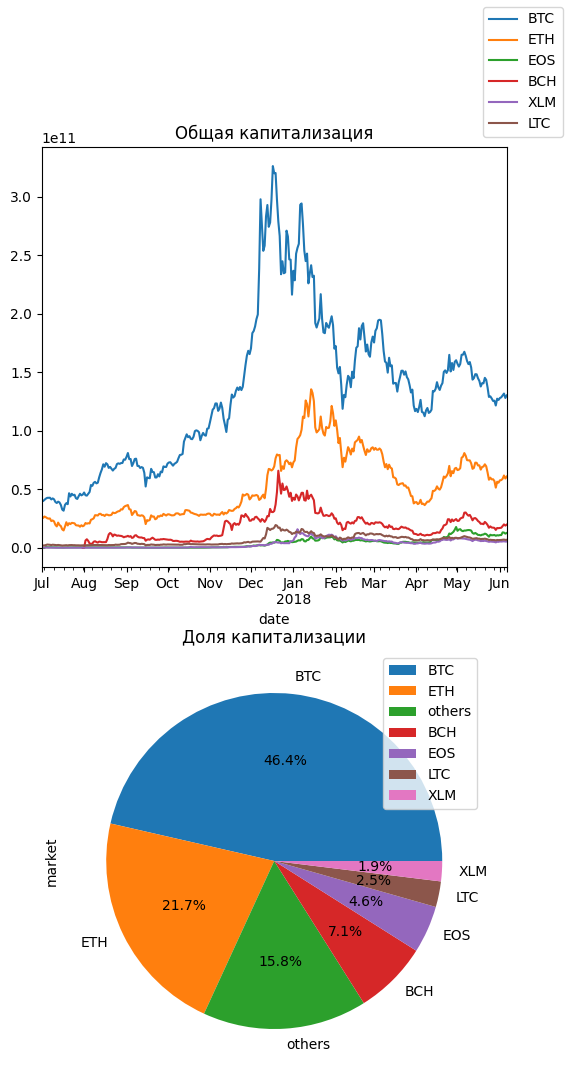

In [22]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [37]:
def calc_coins_correlations(coins: pd.DataFrame, date: str, symbols: list[str], window: int, alpha: float) -> pd.DataFrame:
    from datetime import timedelta
    # возьмем только нужные моенеты
    specified_coin = coins[coins.symbol.isin(symbols)][['symbol', 'market']]
    # возьмем график от data - window до date
    end_date = pd.to_datetime(date)
    start_date = end_date - timedelta(days=window)
    specified_coin = specified_coin[start_date:end_date]
    averaged_ts = {}
    for symbol in symbols:
        coin = specified_coin[specified_coin.symbol == symbol]
        t = coin['market'].ewm(alpha=alpha).mean()
        averaged_ts[symbol] = t.values
    averaged_ts = pd.DataFrame(averaged_ts)
    return averaged_ts.corr().round(3)

In [38]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
# .set_precision(2) не хочет работать, просто округлим до 2
# correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
correlations.style.background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.000000,0.996000,0.060000,0.987000,0.977000,0.997000,0.983000
ETH,0.996000,1.000000,0.060000,0.978000,0.965000,0.996000,0.978000
EOS,0.060000,0.060000,1.000000,0.088000,0.077000,0.057000,0.149000
BCH,0.987000,0.978000,0.088000,1.000000,0.996000,0.990000,0.988000
XLM,0.977000,0.965000,0.077000,0.996000,1.000000,0.982000,0.987000
LTC,0.997000,0.996000,0.057000,0.990000,0.982000,1.000000,0.988000
ADA,0.983000,0.978000,0.149000,0.988000,0.987000,0.988000,1.000000


Довольно интересно ещё взглянуть на 2017-12-27:

In [39]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
correlations.style.background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.000000,0.676000,0.614000,0.411000,0.650000,0.779000,0.545000
ETH,0.676000,1.000000,0.988000,0.909000,0.972000,0.981000,0.957000
EOS,0.614000,0.988000,1.000000,0.949000,0.991000,0.943000,0.986000
BCH,0.411000,0.909000,0.949000,1.000000,0.936000,0.824000,0.965000
XLM,0.650000,0.972000,0.991000,0.936000,1.000000,0.930000,0.988000
LTC,0.779000,0.981000,0.943000,0.824000,0.930000,1.000000,0.893000
ADA,0.545000,0.957000,0.986000,0.965000,0.988000,0.893000,1.000000


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

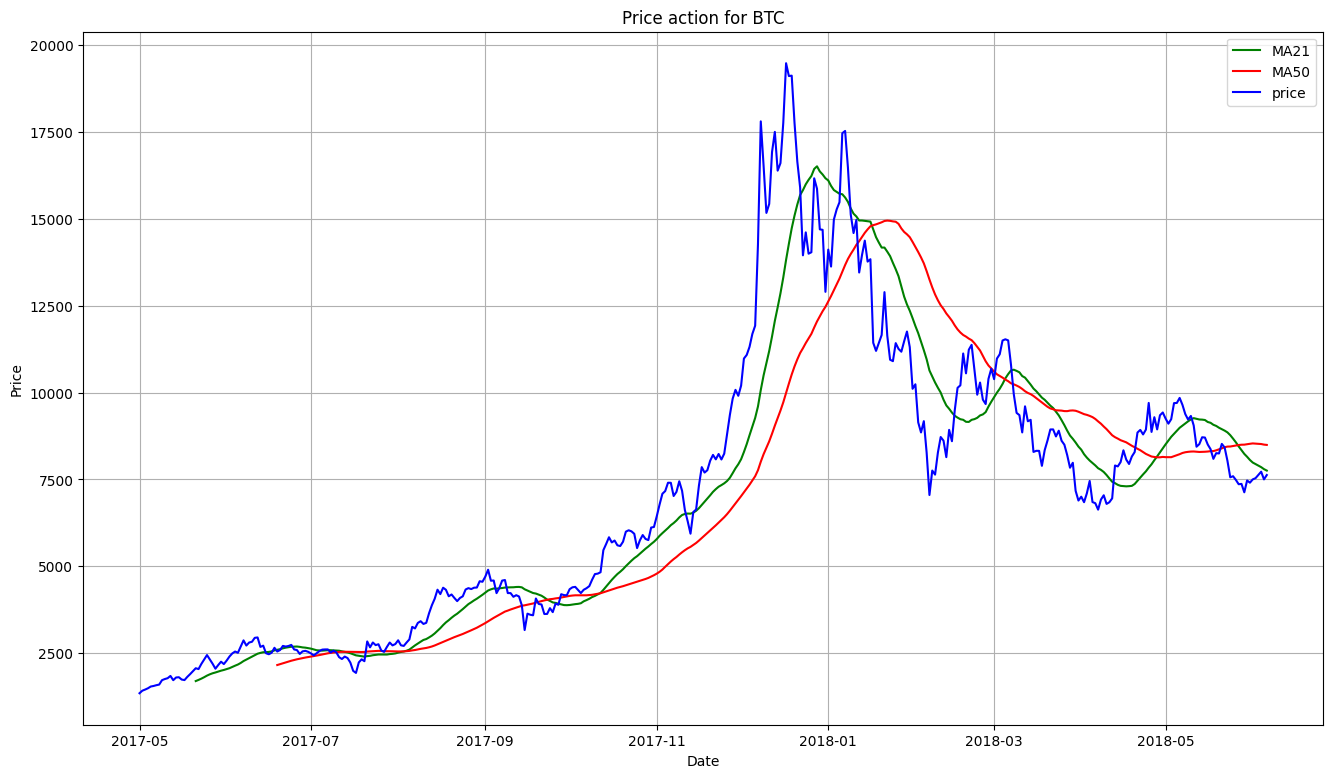

In [40]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.